In [1]:
import numpy as np
import pickle

from keras.models import model_from_json, load_model
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Convolution2D, merge, MaxPooling2D, Input, Add, Concatenate
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_dir = '../../input/train_50/'
test_dir = '../../input/test_50/'


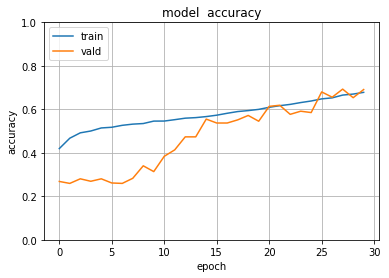

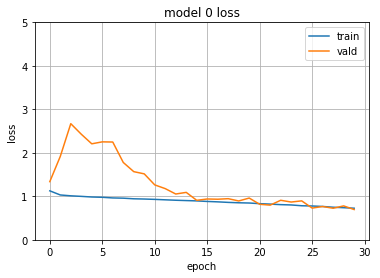

In [162]:
result_dir = 'Result_for_paper2/Result_2LCV/'
idx = 0
with open(result_dir + 'keras_Model-2LCV_T-p32_history.pkl', 'rb') as f:
    history = pickle.load(f)

# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model ' + ' accuracy')
plt.ylim(0,1)
#plt.xlim(0,40)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vald'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model ' + str(idx) + ' loss')
plt.ylim(0,5)
#plt.xlim(0,40)
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vald'], loc='upper right')
plt.show()
    

In [233]:
result_dir = 'Result_for_paper/Result_2L/'
#result_dir = 'Result/Result_22/'
#result_dir = 'Result_2L/'
idx = 0
with open(result_dir + 'keras_Model-2L_T-p43A2_0_history.pkl', 'rb') as f:
    history = pickle.load(f)
#with open(result_dir + 'keras_Model-22_T-03h_0_history.pkl', 'rb') as f:
#    history = pickle.load(f)

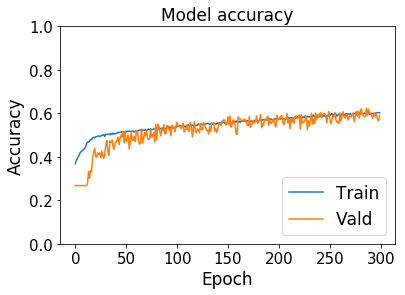

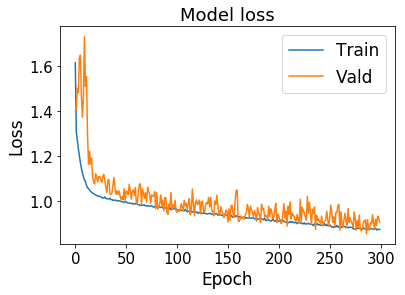

In [234]:
# summarize history for accuracy
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model ' + 'accuracy', fontsize=17)
plt.ylim(0,1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlim(0,40)
#plt.grid()
plt.ylabel('Accuracy', fontsize=17)
plt.xlabel('Epoch', fontsize=17)
plt.legend(['Train', 'Vald'], loc='lower right', fontsize=17)
plt.savefig('fineAcc04.pdf', bbox_inches="tight")
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model ' + 'loss', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0,5)
#plt.xlim(0,40)
#plt.grid()
plt.ylabel('Loss', fontsize=17)
plt.xlabel('Epoch', fontsize=17)
plt.legend(['Train', 'Vald'], loc='upper right', fontsize=17)
plt.savefig('fineLoss04.pdf', bbox_inches="tight")
plt.show()

In [140]:
v = history['val_acc'][:];
print(v.index(max(v)), max(v))

221 0.81875


In [171]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('aa.jpg')
pp.savefig(a)


In [141]:
with open(train_dir + 'labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [143]:
model = load_model(result_dir + 'keras_Model-2L_T-p41A2_0.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 25, 25, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
__________

In [148]:

idx = 0
step = 50
idx += step
fig, axes = plt.subplots(5, 10)
#fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_size_inches(18.5, 10.5, forward=True)
for i, ax in enumerate(axes.flat):
    ID = idx+i
    with open(train_dir + str(ID) + '.pkl', 'rb') as f:
        X = pickle.load(f)
    y = np.argmax(labels[ID])
    ax.imshow(X)
    ax.set_xlabel(str(ID)+': '+str(y))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


NameError: name 'XX' is not defined

In [20]:
print('Conv1 filter:\t 3x3/16, 3x3/32, 3x3/64, 256,32')

Conv1 filter:	 3x3/16, 3x3/32, 3x3/64, 256,32


In [1]:
IMAGE_SHAPE = (50, 50, 1)
NUM_CLASSES = 3
print('Image size: \t\t', IMAGE_SHAPE)

Image size: 		 (50, 50, 1)


In [41]:
import numpy
a = numpy.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
numpy.savetxt("foo.csv", a, delimiter=",")

In [31]:
in_test_dir = '../../input/test/'
with open(in_test_dir + 'labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [39]:
for key in labels:
    labels[key]

In [43]:
Model_ID = '22'

result_dir = 'Result/Result_'+ Model_ID + '/'
test_pred =[[ 0.07116046, 0.91009021, 0.01874934],
 [ 0.26948914 , 0.71785671 , 0.01265416]]
np.savetxt((result_dir +'Test_data_result_M-'+ Model_ID + '_T-'+ '.csv'), test_pred, delimiter=",")

Tensor("ArgMax_1:0", shape=(2,), dtype=int64)


Tensor("strided_slice:0", shape=(), dtype=int64)


In [145]:
EPOCHS = 10
records = dict()
records.update({'acc': np.zeros((EPOCHS,))})
records.update({'loss': np.zeros((EPOCHS,))})
records.update({'val_acc': np.zeros((EPOCHS,))})
records.update({'val_loss': np.zeros((EPOCHS,))})

In [146]:
records['acc'][0] = 100